In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    print(f"Adding {project_root} to sys.path")
    sys.path.append(project_root)


Adding /vol/bitbucket/icc24/MSRGNN to sys.path


In [4]:

from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader, random_split, Dataset
from torchvision import transforms
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import torch
import torch

/vol/venv/icc24/DGL_ENV/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# O3

In [5]:
from O3.data_utility import DeepiqDataset

In [6]:
BATCH_SIZE = 32

In [ ]:
full_dataset = DeepiqDataset(
    dataset_root_dir = "../O3/odd-one-out",
    num_panels = [5]
)

dataset_size = len(full_dataset)
print(f"Dataset size: {dataset_size}")

train_prop = 0.6
val_prop = 0.2
# test_prop = 0.2

train_size = int(train_prop * dataset_size)
val_size = int(val_prop * dataset_size)

test_size = dataset_size - train_size - val_size

print(f"Splitting into:")
print(f"  - Training set:   {train_size} samples ({train_size/dataset_size:.2%})")
print(f"  - Validation set: {val_size} samples ({val_size/dataset_size:.2%})")
print(f"  - Test set:       {test_size} samples ({test_size/dataset_size:.2%})")
print("-" * 40)


generator = torch.Generator().manual_seed(42)

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size], generator=generator
)


print(f"Type of train_dataset: {type(train_dataset)}")

print(f"Actual size of train_dataset: {len(train_dataset)}")
print(f"Actual size of val_dataset:   {len(val_dataset)}")
print(f"Actual size of test_dataset:  {len(test_dataset)}")

assert len(train_dataset) + len(val_dataset) + len(test_dataset) == dataset_size
print("\nSuccessfully split the dataset without losing any data points.")
print("-" * 40)


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in val_loader:   {len(val_loader)}")
print(f"Number of batches in test_loader:  {len(test_loader)}")

Dataset size: 500
Splitting into:
  - Training set:   300 samples (60.00%)
  - Validation set: 100 samples (20.00%)
  - Test set:       100 samples (20.00%)
----------------------------------------
Type of train_dataset: <class 'torch.utils.data.dataset.Subset'>
Actual size of train_dataset: 300
Actual size of val_dataset:   100
Actual size of test_dataset:  100

Successfully split the dataset without losing any data points.
----------------------------------------
Number of batches in train_loader: 10
Number of batches in val_loader:   4
Number of batches in test_loader:  4


Analyzing a total of 500 samples from the dataset.
Generating bar chart for the target index distribution...


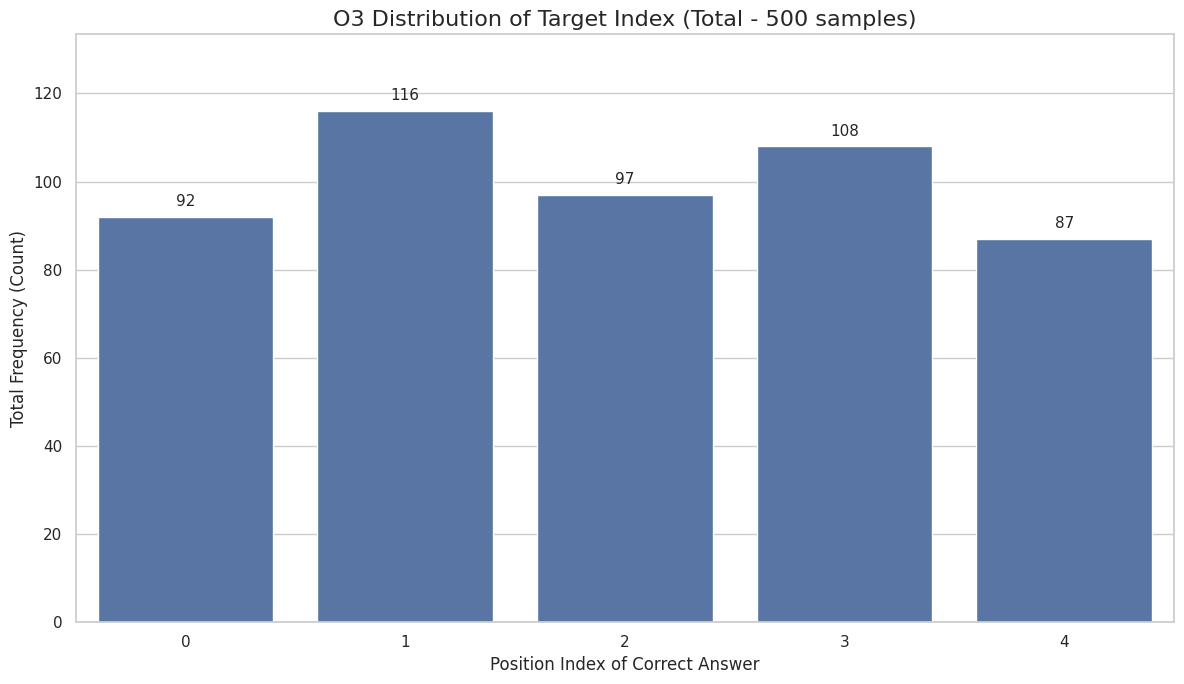

In [ ]:
all_target_indices = full_dataset.correct_answers
total_samples = len(all_target_indices)
print(f"Analyzing a total of {total_samples} samples from the dataset.")


print("Generating bar chart for the target index distribution...")
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid", palette="deep")

max_answer_index = max(all_target_indices)
possible_indices = list(range(max_answer_index + 1))

counts = pd.Series(all_target_indices).value_counts().reindex(possible_indices, fill_value=0)

ax = sns.barplot(x=counts.index, y=counts.values)

y_max = counts.max()
for i, count in enumerate(counts):
    ax.text(i, count + y_max * 0.015, f'{count}', ha='center', va='bottom', fontsize=11)

plt.title(f'O3 Distribution of Target Index (Total - {total_samples} samples)', fontsize=16)
plt.ylabel('Total Frequency (Count)', fontsize=12)
plt.xlabel('Position Index of Correct Answer', fontsize=12)

plt.xticks(ticks=possible_indices)

plt.ylim(0, y_max * 1.15)
plt.tight_layout()
plt.show()